<a href="https://colab.research.google.com/github/andr3w1699/HumanLanguageTechnologyProject/blob/main/SentimentClassificationWithRecurrent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q gdown pandas nltk tensorflow matplotlib numpy==1.26.4 scikit-learn

In [2]:
# Replace FILE_ID with your actual file ID
file_id = '0Bz8a_Dbh9QhbZVhsUnRWRDhETzA'
output_name = 'amazon_review_full_csv.tar.gz'

!gdown --id {file_id} -O {output_name}

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=0Bz8a_Dbh9QhbZVhsUnRWRDhETzA
From (redirected): https://drive.google.com/uc?id=0Bz8a_Dbh9QhbZVhsUnRWRDhETzA&confirm=t&uuid=0c569a8c-820a-40fa-a63e-206a674ec7d1
To: /content/amazon_review_full_csv.tar.gz
100% 644M/644M [00:16<00:00, 39.2MB/s]


In [3]:
import tarfile

with tarfile.open(output_name, "r:gz") as tar:
    tar.extractall("Dataset")

In [4]:
!ls -R Dataset

Dataset:
amazon_review_full_csv

Dataset/amazon_review_full_csv:
readme.txt  test.csv  train.csv


In [5]:
import pandas as pd

# Set options to show full text and all rows
pd.set_option('display.max_colwidth', None)

df_train = pd.read_csv(
    './Dataset/amazon_review_full_csv/train.csv',
    header=None,
    names=['label', 'title', 'text'],
    quotechar='"',
    doublequote=True,
    escapechar='\\',
    engine='python',
    encoding='utf-8',
    on_bad_lines='skip'  # Skip rows with parsing errors
)

df_train.head()

,label,title,text
0,3,more like funchuck,"Gave this to my dad for a gag gift after directing ""Nunsense,"" he got a reall kick out of it!"
1,5,Inspiring,"I hope a lot of people hear this cd. We need more strong and positive vibes like this. Great vocals, fresh tunes, cross-cultural happiness. Her blues is from the gut. The pop sounds are catchy and mature."
2,5,The best soundtrack ever to anything.,"I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny."
3,4,Chrono Cross OST,"The music of Yasunori Misuda is without question my close second below the great Nobuo Uematsu.Chrono Cross OST is a wonderful creation filled with rich orchestra and synthesized sounds. While ambiance is one of the music's major factors, yet at times it's very uplifting and vigorous. Some of my favourite tracks include; ""Scars Left by Time, The Girl who Stole the Stars, and Another World""."
4,5,Too good to be true,Probably the greatest soundtrack in history! Usually it's better to have played the game first but this is so enjoyable anyway! I worked so hard getting this soundtrack and after spending [money] to get it it was really worth every penny!! Get this OST! it's amazing! The first few tracks will have you dancing around with delight (especially Scars Left by Time)!! BUY IT NOW!!


In [6]:
# Number of rows
print("Number of rows:", len(df_train))

# Check for null values
if df_train.isnull().values.any():
    print("There are null elements in the DataFrame.")
else:
    print("There are no null elements in the DataFrame.")

Number of rows: 2999746
There are null elements in the DataFrame.


In [7]:
df_test = pd.read_csv(
    './Dataset/amazon_review_full_csv/test.csv',
    header=None,
    names=['label', 'title', 'text'],
    quotechar='"',
    doublequote=True,
    escapechar='\\',
    engine='python',
    encoding='utf-8',
    on_bad_lines='skip'  # Skip rows with parsing errors
)

df_test.head()

,label,title,text
0,1,mens ultrasheer,"This model may be ok for sedentary types, but I'm active and get around alot in my job - consistently found these stockings rolled up down by my ankles! Not Good!! Solution: go with the standard compression stocking, 20-30, stock #114622. Excellent support, stays up and gives me what I need. Both pair of these also tore as I struggled to pull them up all the time. Good riddance/bad investment!"
1,4,Surprisingly delightful,"This is a fast read filled with unexpected humour and profound insights into the art of politics and policy. In brief, it is sly, wry, and wise."
2,2,"Works, but not as advertised","I bought one of these chargers..the instructions say the lights stay on while the battery charges...true. The instructions doNT say the lights turn off when its done. Which is also true. 24 hours of charging and the lights stay on. I returned it thinking I had a bad unit.The new one did the same thing. I just kept it since it does charge...but the lights are useless since they seem to always stay on. It's a ""backup"" charger for when I manage to drain all my AAs but I wouldn't want this as my only charger."
3,2,Oh dear,"I was excited to find a book ostensibly about Muslim feminism, but this volume did not live up to the expectations.One essay, among other things, describes the veil as potentially liberating. It doesn't begin to explain how or why.Another, on Muslim women in Cape Town, claims that Muslim women there are separate but ""more than equal."" Gee whiz, what a disappointment.I had expected and hoped for at least one Muslim feminist condemnation of gender apartheid. But there is not a single one in the book.I'm surprised it didn't have an essay extolling the virtues of female genital mutilation.--Alyssa A. Lappen"
4,2,Incorrect disc!,"I am a big JVC fan, but I do not like this model, I was suspiscious when I saw several units in the return section of the store. I bought one anyway (new) and must say I am not happy. The unit sends out clicks to the receiver once in a while, the transition between scenes is not always smooth,(like a little pause) and while it is still fairly new I can't get any DVD,CD or even a DVD headcleaner to work. All I get is a ""incorrect disc"" message."


In [8]:
# Number of rows
print("Number of rows:", len(df_test))

# Check for null values
if df_test.isnull().values.any():
    print("There are null elements in the DataFrame.")
else:
    print("There are no null elements in the DataFrame.")

Number of rows: 649954
There are null elements in the DataFrame.


In [9]:
# Keep only positive (4,5) and negative (1,2) ratings
df_train_binary = df_train[df_train['label'] != 3].copy()

# Map ratings to binary sentiment
df_train_binary['sentiment'] = df_train_binary['label'].apply(lambda x: 1 if x > 3 else 0)

In [10]:
df_train_binary['review'] = df_train_binary['title'].fillna('') + ' ' + df_train_binary['text'].fillna('')
df_train_sampled = df_train_binary.sample(n=1000000, random_state=42)
X = df_train_sampled['review'].values
y = df_train_sampled['sentiment'].values

In [11]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('popular')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    

True

In [12]:
# lowercasing
X = [text.lower() for text in X]
X = [text.replace('\n', ' ') for text in X]  # Remove line breaks

# removing punctuation
# import string
# X = [text.translate(str.maketrans('', '', string.punctuation)) for text in X]

# removing stop words
# from nltk.corpus import stopwords
# stop_words = set(stopwords.words('english'))
# X = [' '.join([word for word in text.split() if word not in stop_words]) for text in X]

# stemming/lemmatization
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()
# X = [' '.join([lemmatizer.lemmatize(word) for word in text.split()]) for text in X]

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters
max_words = 30000  # Size of vocabulary

# Tokenizer
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X)

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(X)

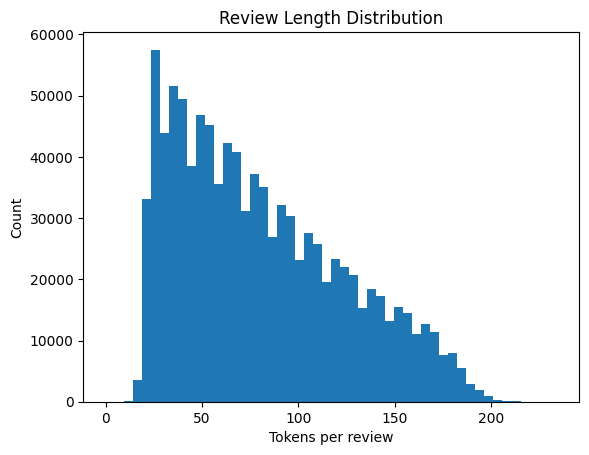

In [14]:
import matplotlib.pyplot as plt
lengths = [len(seq) for seq in sequences]
plt.hist(lengths, bins=50)
plt.title("Review Length Distribution")
plt.xlabel("Tokens per review")
plt.ylabel("Count")
plt.show()

In [15]:
import numpy as np
print("95th percentile length:", np.percentile(lengths, 95))

95th percentile length: 164.0


In [16]:
max_len = 164      # Max review length

# Convert text to sequences
# sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_padded, y, test_size=0.2, random_state=42)

In [18]:
from tensorflow.keras.layers import Bidirectional,LSTM, Input, Dense, Dropout, Embedding
from tensorflow.keras.models import Sequential

model_BiLSTM = Sequential([
    Input(shape=(max_len,)),  # Define the input shape
    Embedding(input_dim=max_words, output_dim=128),
    Bidirectional(LSTM(64)),  # BiLSTM instead of LSTM
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model_BiLSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_BiLSTM.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 164, 128)       │     3,840,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,938,945 (15.03 MB)

 Trainable params: 3,938,945 (15.03 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
from tensorflow.keras.layers import LSTM, Input, Dense, Dropout, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping


# Define EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

# Train the model with EarlyStopping
history = model_BiLSTM.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=512,
    epochs=5,
    callbacks=[early_stop]  # 👈 Early stopping in action
)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 43ms/step - accuracy: 0.8724 - loss: 0.3005 - val_accuracy: 0.9297 - val_loss: 0.1840
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 47ms/step - accuracy: 0.9398 - loss: 0.1622 - val_accuracy: 0.9339 - val_loss: 0.1728
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 44ms/step - accuracy: 0.9518 - loss: 0.1329 - val_accuracy: 0.9342 - val_loss: 0.1755
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.9607 - loss: 0.1106 - val_accuracy: 0.9309 - val_loss: 0.1969


In [20]:
# Keep only positive (4,5) and negative (1,2) ratings
df_test_binary = df_test[df_test['label'] != 3].copy()

# Map ratings to binary sentiment
df_test_binary['sentiment'] = df_test_binary['label'].apply(lambda x: 1 if x > 3 else 0)


# Preprocess test set
df_test_binary['review'] = df_test_binary['title'].fillna('') + ' ' + df_test_binary['text'].fillna('')

df_test_sampled = df_test_binary.sample(n=500000, random_state=42)
X_test = df_test_sampled['review'].values

# lowercasing
X_test = [text.lower() for text in X_test]
X_test = [text.replace('\n', ' ') for text in X_test]  # Remove line breaks

# removing punctuation
# import string
# X_test = [text.translate(str.maketrans('', '', string.punctuation)) for text in X_test]

# removing stop words
# from nltk.corpus import stopwords
# stop_words = set(stopwords.words('english'))
# X_test = [' '.join([word for word in text.split() if word not in stop_words]) for text in X_test]

# stemming/lemmatization
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()
# X_test = [' '.join([lemmatizer.lemmatize(word) for word in text.split()]) for text in X_test]



X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')
y_test = df_test_sampled['sentiment'].values

# Evaluate
loss, acc = model_BiLSTM.evaluate(X_test_padded, y_test)
print(f"Test accuracy: {acc:.2f}")



15625/15625 ━━━━━━━━━━━━━━━━━━━━ 112s 7ms/step - accuracy: 0.9343 - loss: 0.1717
Test accuracy: 0.93


In [21]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping

model_BiLSTM_CNN = Sequential([
    Input(shape=(max_len,)),
    Embedding(input_dim=max_words, output_dim=128),

    Bidirectional(LSTM(64, return_sequences=True)),  # Keep sequences for CNN
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),

    GlobalMaxPooling1D(),  # 👈 This flattens (batch, time, features) → (batch, features)
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_BiLSTM_CNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

# Train the model
history = model_BiLSTM_CNN.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=512,
    epochs=10,
    callbacks=[early_stop]
)

# Show model summary
model_BiLSTM_CNN.summary()

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 60ms/step - accuracy: 0.8695 - loss: 0.2942 - val_accuracy: 0.9312 - val_loss: 0.1775
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 58ms/step - accuracy: 0.9413 - loss: 0.1583 - val_accuracy: 0.9364 - val_loss: 0.1707
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 57ms/step - accuracy: 0.9550 - loss: 0.1263 - val_accuracy: 0.9325 - val_loss: 0.1800
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 57ms/step - accuracy: 0.9643 - loss: 0.1026 - val_accuracy: 0.9348 - val_loss: 0.1863


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 164, 128)       │     3,840,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 164, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 162, 64)        │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 81, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,890,565 (45.36 MB)

 Trainable params: 3,963,521 (15.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,927,044 (30.24 MB)

In [22]:
# Evaluate
loss, acc = model_BiLSTM_CNN.evaluate(X_test_padded, y_test)
print(f"Test accuracy: {acc:.2f}")


15625/15625 ━━━━━━━━━━━━━━━━━━━━ 114s 7ms/step - accuracy: 0.9363 - loss: 0.1695
Test accuracy: 0.94


In [23]:
from tensorflow.keras.layers import GRU, Input, Dense, Dropout, Embedding
from tensorflow.keras.models import Sequential

model_GRU = Sequential([
    Input(shape=(max_len,)),  # Same input shape
    Embedding(input_dim=max_words, output_dim=128),
    Bidirectional(GRU(64)),                  # 👈 GRU instead of LSTM
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_GRU.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_GRU.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 164, 128)       │     3,840,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 128)            │        74,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,914,625 (14.93 MB)

 Trainable params: 3,914,625 (14.93 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Early stopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

# Train the model
history = model_GRU.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=512,
    epochs=20,
    callbacks=[early_stop]
)

# Show model summary
model_GRU.summary()

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 42ms/step - accuracy: 0.8712 - loss: 0.3010 - val_accuracy: 0.9304 - val_loss: 0.1811
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.9400 - loss: 0.1611 - val_accuracy: 0.9350 - val_loss: 0.1691
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 45ms/step - accuracy: 0.9522 - loss: 0.1324 - val_accuracy: 0.9354 - val_loss: 0.1706
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 42ms/step - accuracy: 0.9614 - loss: 0.1111 - val_accuracy: 0.9316 - val_loss: 0.1833


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 164, 128)       │     3,840,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 128)            │        74,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,743,877 (44.80 MB)

 Trainable params: 3,914,625 (14.93 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,829,252 (29.87 MB)

In [25]:
# Evaluate
loss, acc = model_GRU.evaluate(X_test_padded, y_test)
print(f"Test accuracy: {acc:.2f}")

15625/15625 ━━━━━━━━━━━━━━━━━━━━ 110s 7ms/step - accuracy: 0.9355 - loss: 0.1690
Test accuracy: 0.94


In [26]:
from tensorflow.keras.layers import SimpleRNN, Input, Dense, Dropout, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

model_Simple_RNN = Sequential([
    Input(shape=(max_len,)),               # input_length = max_len
    Embedding(input_dim=max_words,         # vocabulary size
              output_dim=128),             # embedding dimension
    Bidirectional(SimpleRNN(128)),                        # simple RNN with 128 units
    Dropout(0.5),
    Dense(1, activation='sigmoid')         # binary output
])

model_Simple_RNN.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model_Simple_RNN.summary()

# Early stopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

# Train
history = model_Simple_RNN.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=512,
    epochs=20,
    callbacks=[early_stop]
)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 164, 128)       │     3,840,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,906,049 (14.90 MB)

 Trainable params: 3,906,049 (14.90 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 48ms/step - accuracy: 0.8387 - loss: 0.3492 - val_accuracy: 0.9037 - val_loss: 0.2410
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 46ms/step - accuracy: 0.9080 - loss: 0.2345 - val_accuracy: 0.8522 - val_loss: 0.3513
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.8677 - loss: 0.3238 - val_accuracy: 0.8616 - val_loss: 0.3436


In [27]:
# Evaluate
loss, acc = model_Simple_RNN.evaluate(X_test_padded, y_test)
print(f"Test accuracy: {acc:.2f}")

15625/15625 ━━━━━━━━━━━━━━━━━━━━ 132s 8ms/step - accuracy: 0.9050 - loss: 0.2394
Test accuracy: 0.90


In [28]:
import os

# Path where GloVe will be stored
glove_path = "glove.6B.zip"

# Check if file already exists
if not os.path.isfile(glove_path):
    !wget -c http://nlp.stanford.edu/data/glove.6B.zip
else:
    print("GloVe file already exists. Skipping download.")

--2025-04-27 09:24:43--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-04-27 09:24:43--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-04-27 09:24:44--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [29]:
# Check if the specific GloVe file already exists
if not os.path.isfile("glove.6B.100d.txt"):
    !unzip -q glove.6B.zip glove.6B.100d.txt
    print("Unzipped glove.6B.100d.txt")
else:
    print("glove.6B.100d.txt already exists. Skipping unzip.")

Unzipped glove.6B.100d.txt


In [30]:
embedding_index = {}
with open('glove.6B.100d.txt', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

In [31]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, idx in tokenizer.word_index.items():
    if idx < max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector
        else:
            # Random init for words not found in GloVe
            embedding_matrix[idx] = np.random.normal(size=(embedding_dim,))

In [32]:
from tensorflow.keras.layers import Embedding

model_BiLSTM = Sequential([
    Input(shape=(max_len,)),
    Embedding(
        input_dim=max_words,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        input_length=max_len,
        trainable=True  # freeze or True to fine-tune
    ),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_BiLSTM.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model_BiLSTM.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 164, 100)       │     3,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 128)            │        84,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,084,609 (11.77 MB)

 Trainable params: 3,084,609 (11.77 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Assuming you’ve already defined:
# - model_BiLSTM
# - X_train, y_train, X_val, y_val
# - early_stop = EarlyStopping(...)

history = model_BiLSTM.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=512,
    epochs=20,
    callbacks=[early_stop],
    verbose=1               # show progress bar
)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 45ms/step - accuracy: 0.8519 - loss: 0.3311 - val_accuracy: 0.9234 - val_loss: 0.1953
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 47ms/step - accuracy: 0.9320 - loss: 0.1792 - val_accuracy: 0.9343 - val_loss: 0.1715
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 45ms/step - accuracy: 0.9439 - loss: 0.1522 - val_accuracy: 0.9370 - val_loss: 0.1689
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.9516 - loss: 0.1342 - val_accuracy: 0.9371 - val_loss: 0.1701
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 45ms/step - accuracy: 0.9583 - loss: 0.1180 - val_accuracy: 0.9354 - val_loss: 0.1804


In [34]:
# Evaluate
loss, acc = model_BiLSTM.evaluate(X_test_padded, y_test)
print(f"Test accuracy: {acc:.2f}")

15625/15625 ━━━━━━━━━━━━━━━━━━━━ 118s 8ms/step - accuracy: 0.9368 - loss: 0.1686
Test accuracy: 0.94


In [35]:
# Check if the zip file exists
if not os.path.isfile("wiki-news-300d-1M.vec.zip"):
    !wget -c https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
else:
    print("FastText zip file already exists. Skipping download.")

# Check if the .vec file has already been extracted
if not os.path.isfile("wiki-news-300d-1M.vec"):
    !unzip -q wiki-news-300d-1M.vec.zip
    print("Unzipped FastText vectors.")
else:
    print("FastText .vec file already extracted. Skipping unzip.")

--2025-04-27 09:36:43--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.254.15, 108.157.254.124, 108.157.254.102, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.254.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip’

wiki-news-300d-1M.v 100%[===================>] 650.22M  28.7MB/s    in 17s     

2025-04-27 09:37:00 (38.6 MB/s) - ‘wiki-news-300d-1M.vec.zip’ saved [681808098/681808098]

Unzipped FastText vectors.


In [36]:
embedding_index = {}
with open('wiki-news-300d-1M.vec', encoding='utf8', errors='ignore') as f:
    next(f)  # skip header line: “1000000 300”
    for line in f:
        values = line.rstrip().split(' ')
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

In [37]:
embedding_dim = 300
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, idx in tokenizer.word_index.items():
    if idx < max_words:
        vector = embedding_index.get(word)
        if vector is not None:
            embedding_matrix[idx] = vector
        else:
            # you can use random init or zeros
            embedding_matrix[idx] = np.random.normal(size=(embedding_dim,))

In [38]:
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense, Input
from tensorflow.keras.models import Sequential

model_FT = Sequential([
    Input(shape=(max_len,)),
    Embedding(
        input_dim=max_words,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        input_length=max_len,
        trainable=True  # or True to fine-tune
    ),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_FT.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model_FT.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 164, 300)       │     9,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 128)            │       186,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,187,009 (35.05 MB)

 Trainable params: 9,187,009 (35.05 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
history = model_FT.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=512,
    epochs=10,            # start small; EarlyStopping will help
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 79ms/step - accuracy: 0.8759 - loss: 0.2908 - val_accuracy: 0.9309 - val_loss: 0.1785
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 78ms/step - accuracy: 0.9408 - loss: 0.1590 - val_accuracy: 0.9365 - val_loss: 0.1665
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 78ms/step - accuracy: 0.9536 - loss: 0.1281 - val_accuracy: 0.9366 - val_loss: 0.1692
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 78ms/step - accuracy: 0.9636 - loss: 0.1042 - val_accuracy: 0.9347 - val_loss: 0.1779


In [40]:
# Evaluate
loss, acc = model_FT.evaluate(X_test_padded, y_test)
print(f"Test accuracy: {acc:.2f}")

15625/15625 ━━━━━━━━━━━━━━━━━━━━ 138s 9ms/step - accuracy: 0.9365 - loss: 0.1656
Test accuracy: 0.94
